**Prof. Gustavo Moreira / Esalq-USP** 👽

# 1) Importando dados

In [1]:
# Importando a base de dados felicidade

from google.colab import files
import pandas as pd

# Fazer upload do arquivo
uploaded = files.upload()

# Lendo o arquivo Excel
df1 = pd.read_excel(next(iter(uploaded)))
df1.head()

Saving felicidade.xlsx to felicidade.xlsx


,homem,idade,kids,anosestudo,felicidade
0,1,37.0,1,18,1
1,0,32.0,1,16,1
2,1,37.0,1,20,1
3,0,32.0,1,17,1
4,1,37.0,1,14,1


# 2) Estatísticas descritivas

In [2]:
# prompt: me informe estatísticas descritivas das variáveis idade e anosestudo

df1[['idade', 'anosestudo']].describe()

,idade,anosestudo
count,585.000000,585.000000
mean,32.321368,16.213675
std,9.227535,2.357693
min,17.500000,9.000000
25%,27.000000,14.000000
50%,32.000000,16.000000
75%,37.000000,18.000000
max,57.000000,20.000000


In [4]:
# prompt: contar as categorias de felicidade

df1['felicidade'].value_counts()

,count
felicidade,
4,232
3,194
2,93
1,66


In [6]:
# prompt: fazer tabela cruzada felicidade e kids em formato percentual

# tabela cruzada
pd.crosstab(df1['felicidade'], df1['kids'], normalize='index') * 100

kids,0,1
felicidade,,
1,12.121212,87.878788
2,25.806452,74.193548
3,20.618557,79.381443
4,41.379310,58.620690


In [7]:
# prompt: correlação entre idade e anosestudo

df1[['idade', 'anosestudo']].corr()

,idade,anosestudo
idade,1.000000,0.163776
anosestudo,0.163776,1.000000


# 3) Visualizando dados - gráficos básicos

FICOU MUITO FÁCIL FAZER GRÁFICOS NO PYTHON COM O AUXÍLIO DA IA! UTILIZE A CRIATIVIDADE! ⏬⏬⏬⏬⏬

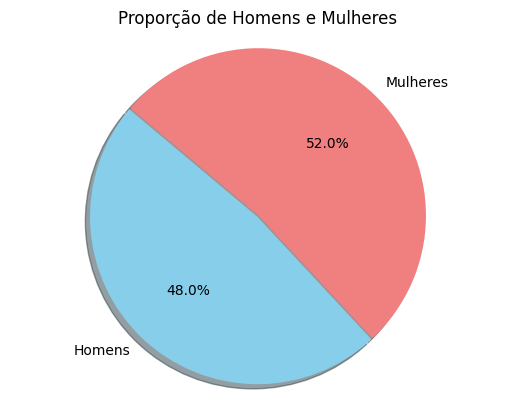

In [12]:
# Gráfico de pizza contando o número de homens e mulheres na amostra.

import matplotlib.pyplot as plt

# Calcula a quantidade de homens e mulheres
homens = df1['homem'].sum()
mulheres = len(df1) - homens

# Cria o gráfico de pizza
labels = ['Homens', 'Mulheres']
sizes = [homens, mulheres]
colors = ['skyblue', 'lightcoral']
explode = (0.01, 0)  # Explode a primeira fatia (homens)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  # Para garantir que o gráfico seja um círculo
plt.title('Proporção de Homens e Mulheres')
plt.show()


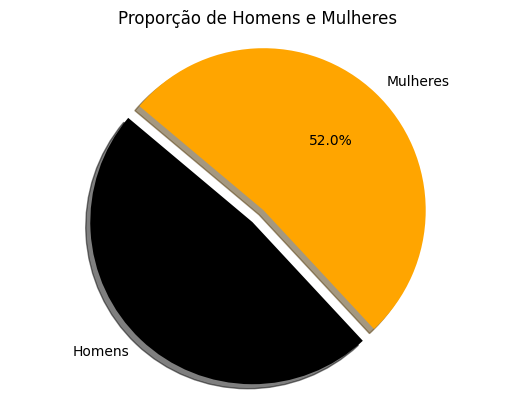

In [13]:
# prompt: # Gráfico de pizza contando o número de homens e mulheres na amostra, cores azul e amarelo.

# Gráfico de pizza contando o número de homens e mulheres na amostra, cores azul e amarelo.
# Calcula a quantidade de homens e mulheres
homens = df1['homem'].sum()
mulheres = len(df1) - homens

# Cria o gráfico de pizza
labels = ['Homens', 'Mulheres']
sizes = [homens, mulheres]
colors = ['black', 'orange'] # cores azul e amarelo
explode = (0.1, 0)  # Explode a primeira fatia (homens)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  # Para garantir que o gráfico seja um círculo
plt.title('Proporção de Homens e Mulheres')
plt.show()


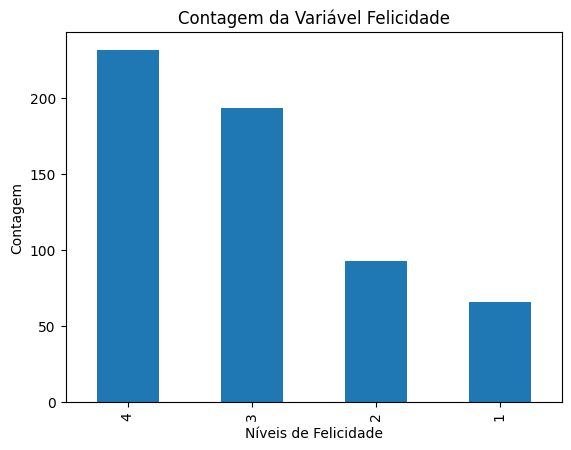

In [14]:
# Gráfico de barras contando a variável felicidade

df1['felicidade'].value_counts().plot(kind='bar')
plt.title('Contagem da Variável Felicidade')
plt.xlabel('Níveis de Felicidade')
plt.ylabel('Contagem')
plt.show()


<ipython-input-15-5d75b5264ef4>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', len(felicidade_counts)) # Define um mapa de cores


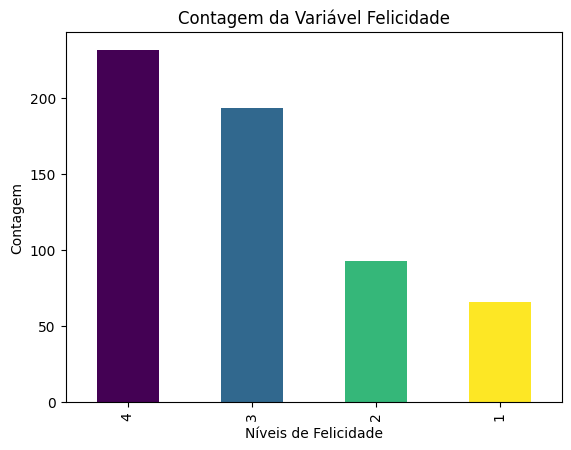

In [15]:
# prompt: # Gráfico de barras contando a variável felicidade. Cada barra de uma cor. Sem bordas laterais.

# Gráfico de barras contando a variável felicidade. Cada barra de uma cor. Sem bordas laterais.
import matplotlib.pyplot as plt

felicidade_counts = df1['felicidade'].value_counts()
colors = plt.cm.get_cmap('viridis', len(felicidade_counts)) # Define um mapa de cores

ax = felicidade_counts.plot(kind='bar', color=colors(range(len(felicidade_counts))), edgecolor='none') # Sem bordas laterais
plt.title('Contagem da Variável Felicidade')
plt.xlabel('Níveis de Felicidade')
plt.ylabel('Contagem')
plt.show()


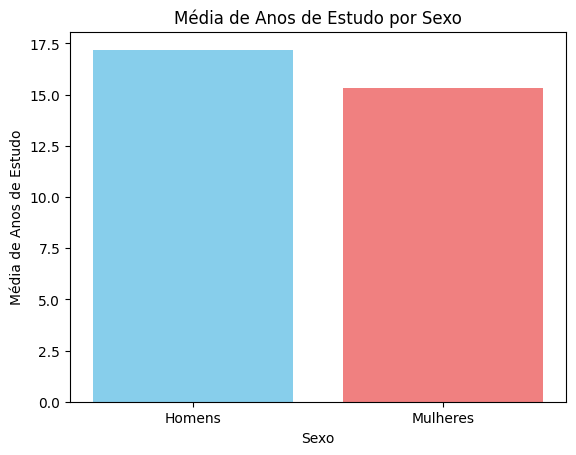

In [16]:
# prompt: faça um gráfico de barras mostrando a média de anos de estudo por sexo

# Calcula a média de anos de estudo por sexo
media_anos_estudo_homens = df1[df1['homem'] == 1]['anosestudo'].mean()
media_anos_estudo_mulheres = df1[df1['homem'] == 0]['anosestudo'].mean()

# Cria o gráfico de barras
labels = ['Homens', 'Mulheres']
means = [media_anos_estudo_homens, media_anos_estudo_mulheres]

plt.bar(labels, means, color=['skyblue', 'lightcoral'])
plt.title('Média de Anos de Estudo por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Média de Anos de Estudo')
plt.show()


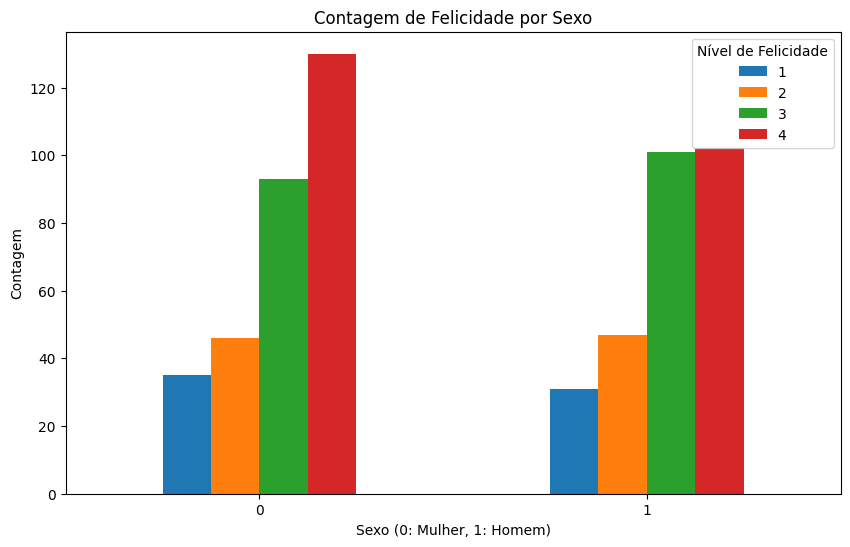

In [17]:
# prompt: faça um gráfico de barras agrupados mostrando a contagem de felicidade por sexo

# Agrupar os dados por sexo e felicidade e contar as ocorrências
felicidade_por_sexo = df1.groupby(['homem', 'felicidade']).size().unstack()

# Criar o gráfico de barras agrupadas
felicidade_por_sexo.plot(kind='bar', figsize=(10, 6))
plt.title('Contagem de Felicidade por Sexo')
plt.xlabel('Sexo (0: Mulher, 1: Homem)')
plt.ylabel('Contagem')
plt.xticks(rotation=0)  # Rotacionar os rótulos do eixo x para melhor visualização
plt.legend(title='Nível de Felicidade')
plt.show()


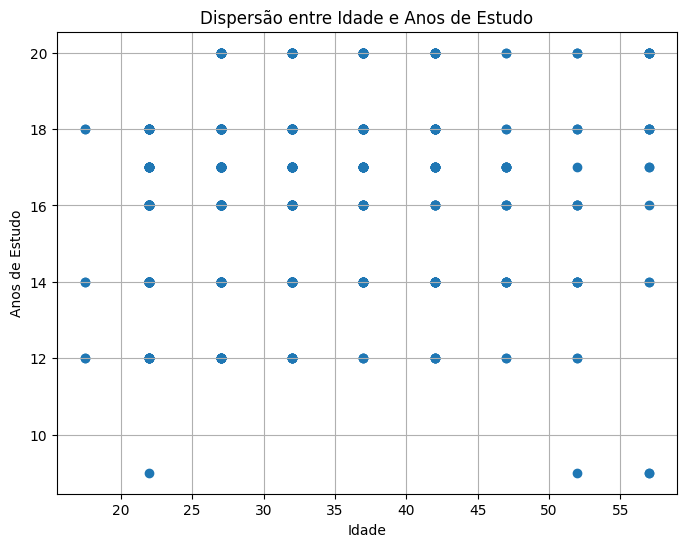

In [18]:
# prompt: Faça um gráfico de dispersão entre idade e anosestudo

# Gráfico de dispersão entre idade e anos de estudo
plt.figure(figsize=(8, 6))
plt.scatter(df1['idade'], df1['anosestudo'])
plt.title('Dispersão entre Idade e Anos de Estudo')
plt.xlabel('Idade')
plt.ylabel('Anos de Estudo')
plt.grid(True)
plt.show()


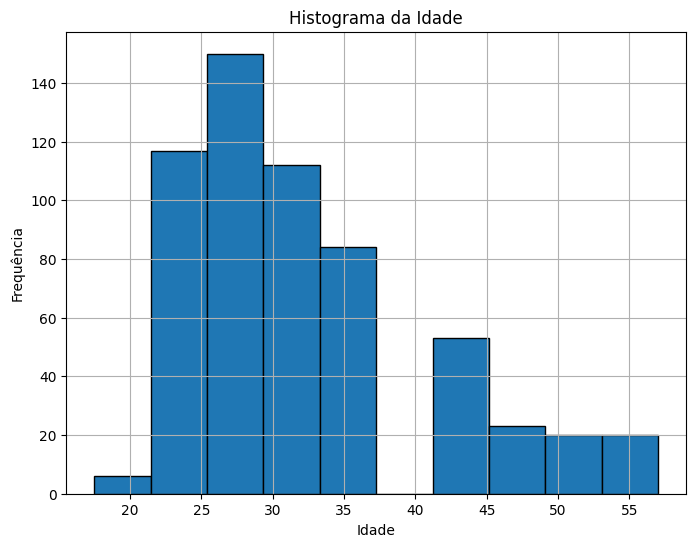

In [19]:
# prompt: Faça um histograma da idade

# Histograma da idade
plt.figure(figsize=(8, 6))
plt.hist(df1['idade'], bins=10, edgecolor='black')  # Ajuste o número de bins conforme necessário
plt.title('Histograma da Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()


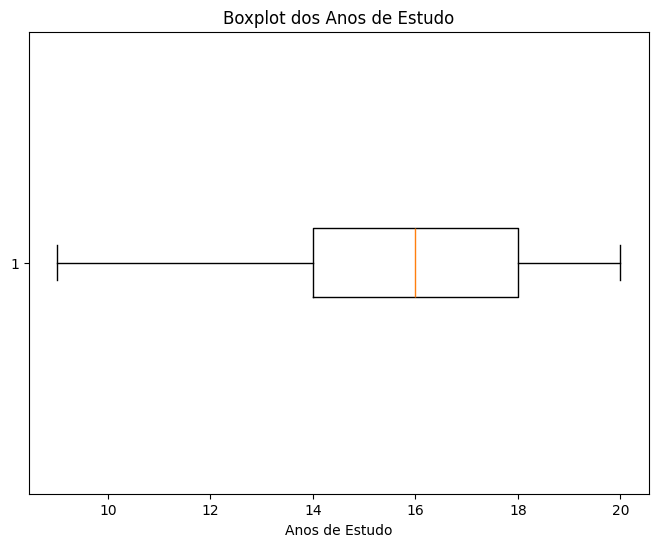

In [20]:
# prompt: Faça um gráfico boxplot com alguma variavel
#Obs.: descubra o significado dos elementos do boxplot

# Gráfico Boxplot da variável 'anosestudo'
plt.figure(figsize=(8, 6))
plt.boxplot(df1['anosestudo'], vert=False) # vert=False para plotar horizontal
plt.title('Boxplot dos Anos de Estudo')
plt.xlabel('Anos de Estudo')
plt.show()


# 4) Gráficos interativos

In [21]:
# prompt: # Vamos torná-lo mais informativo e interativo com o plotly

from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

# # Visualizando dados - gráficos básicos com Plotly

# Gráfico de pizza contando o número de homens e mulheres na amostra.
homens = df1['homem'].sum()
mulheres = len(df1) - homens

fig = go.Figure(data=[go.Pie(labels=['Homens', 'Mulheres'], values=[homens, mulheres])])
fig.update_layout(title_text='Proporção de Homens e Mulheres')
fig.show()

In [22]:
# Gráfico de barras contando a variável felicidade
fig = px.histogram(df1, x='felicidade', title='Contagem da Variável Felicidade',
                   labels={'felicidade': 'Níveis de Felicidade', 'count': 'Contagem'})
fig.show()

In [23]:
# Média de anos de estudo por sexo com Plotly
media_anos_estudo_homens = df1[df1['homem'] == 1]['anosestudo'].mean()
media_anos_estudo_mulheres = df1[df1['homem'] == 0]['anosestudo'].mean()

fig = go.Figure(data=[go.Bar(x=['Homens', 'Mulheres'], y=[media_anos_estudo_homens, media_anos_estudo_mulheres])])
fig.update_layout(title_text='Média de Anos de Estudo por Sexo',
                  xaxis_title='Sexo',
                  yaxis_title='Média de Anos de Estudo')
fig.show()

In [24]:
# Felicidade por sexo com Plotly
felicidade_por_sexo = df1.groupby(['homem', 'felicidade']).size().unstack()
fig = px.bar(felicidade_por_sexo, barmode='group', title='Contagem de Felicidade por Sexo')
fig.update_layout(xaxis_title='Sexo (0: Mulher, 1: Homem)', yaxis_title='Contagem')
fig.show()

In [25]:
# Gráfico de dispersão entre idade e anos de estudo com Plotly
fig = px.scatter(df1, x='idade', y='anosestudo', title='Dispersão entre Idade e Anos de Estudo')
fig.show()

In [26]:
# Histograma da idade com Plotly
fig = px.histogram(df1, x='idade', title='Histograma da Idade', nbins=10,
                   labels={'idade':'Idade', 'count':'Frequência'})
fig.show()

In [27]:
# Boxplot da variável 'anosestudo' com Plotly
fig = px.box(df1, y='anosestudo', title='Boxplot dos Anos de Estudo')
fig.show()

In [28]:
#Mapa de correlações entre anosestudo e idade

import plotly.express as px

# Matriz de correlação com Seaborn e Plotly somente para as variáveis 'anosestudo' e 'idade'
correlation_matrix = df1[['anosestudo', 'idade']].corr()

fig = px.imshow(correlation_matrix, text_auto=True, aspect="auto")
fig.update_layout(title_text='Matriz de Correlação das Variáveis anosestudo e idade')
fig.show()


# 5) Exercícios

In [ ]:
# a) Carregue a base dados_clientes em excel para o Google Colab e importe-a
# utilizando pandas.

# b) Inspecionar os dados
#Antes de criar gráficos, é importante entender a estrutura dos dados. Responda às seguintes perguntas:
#Quais são as colunas (variáveis) do dataset?
#Existem valores nulos na base? Utilize algum comando para fazer isso!
#Qual o tipo de cada variável? (Qualitativa ou Quantitativa?)

# c) Criar visualizações gráficas
#Utilizando a biblioteca matplotlib ou seaborn, faça os seguintes gráficos:

# c.1) Histograma da idade dos clientes. Obs.: Você deve criar a variável idade a partir da variável ano_nascimento.
# c.2) Gráfico de barras da contagem de clientes por categoria (exemplo: estado civil, interesse e religião).
# c.3) Boxplot da distribuição da altura dos clientes.

# d) Utilize a ferramenta plotly para gerar 3 gráficos interativos à sua
# escolha a partir das variáveis da base de dados importada.